Требуется построить одномерный временной ряд, отражающий зависимость итоговой стоимости билетов (**Ticket cost**) от числа дней между датами вылета и заказа ({**Flight Date - Sale Data**} в днях).

In [34]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Load df

In [35]:
df = pd.read_excel("airline_flights_data_ord.xlsx", header=1).dropna(axis=1, how='all')

In [36]:
df.head()

customer type    Year    order #  Sale Date Flight date  \
NaN NaN NaN NaN       private  2017.0  6762205.0 2017-01-17  2017-01-18   
            NaN       private  2017.0  6762216.0 2017-01-17  2017-01-18   
            NaN       private  2017.0  6773425.0 2017-01-25  2017-03-09   
            NaN       private  2017.0  6774017.0 2017-01-25  2017-03-09   
            NaN       private  2017.0  6774135.0 2017-01-25  2017-03-09   

                Holiday Y/N  Sum $  Service1  Service2  Service3  # of legs  \
NaN NaN NaN NaN         NaN  250.0         0         0         0        2.0   
            NaN         NaN    0.0         0         0         0       16.0   
            NaN         NaN    0.0         0         0         0        0.0   
            NaN         NaN    0.0         0         0         0        0.0   
            NaN         NaN    0.0         0         0         0        0.0   

                 Столбец1  Ticket cost  
NaN NaN NaN NaN     250.0        125.0  
            NaN       0.0          0.0  
            NaN       0.0          0.0  
            NaN       0.0          0.0  
            NaN       0.0          0.0

In [37]:
df["flight_sale_diff"] = df["Flight date"] - df["Sale Date"]
df["flight_sale_diff_days"] = df.apply(lambda x: x["flight_sale_diff"].days, axis=1)

In [38]:
df.head()

customer type    Year    order #  Sale Date Flight date  \
NaN NaN NaN NaN       private  2017.0  6762205.0 2017-01-17  2017-01-18   
            NaN       private  2017.0  6762216.0 2017-01-17  2017-01-18   
            NaN       private  2017.0  6773425.0 2017-01-25  2017-03-09   
            NaN       private  2017.0  6774017.0 2017-01-25  2017-03-09   
            NaN       private  2017.0  6774135.0 2017-01-25  2017-03-09   

                Holiday Y/N  Sum $  Service1  Service2  Service3  # of legs  \
NaN NaN NaN NaN         NaN  250.0         0         0         0        2.0   
            NaN         NaN    0.0         0         0         0       16.0   
            NaN         NaN    0.0         0         0         0        0.0   
            NaN         NaN    0.0         0         0         0        0.0   
            NaN         NaN    0.0         0         0         0        0.0   

                 Столбец1  Ticket cost flight_sale_diff  flight_sale_diff_days  
NaN NaN NaN NaN     250.0        125.0           1 days                    1.0  
            NaN       0.0          0.0           1 days                    1.0  
            NaN       0.0          0.0          43 days                   43.0  
            NaN       0.0          0.0          43 days                   43.0  
            NaN       0.0          0.0          43 days                   43.0

In [39]:
df.describe()

,Year,order #,Sum $,Service1,Service2,Service3,# of legs,Столбец1,Ticket cost,flight_sale_diff,flight_sale_diff_days
count,7817.000000,7.817000e+03,7.818000e+03,7818.000000,7818.0,7818.000000,7817.000000,7817.000000,7806.000000,7817,7817.000000
mean,2017.736344,7.580597e+06,1.613322e+03,0.708365,0.0,0.732924,3.079186,570.808501,146.727975,34 days 16:37:42.146603,34.692849
std,0.466592,3.095173e+05,7.142735e+04,31.327189,0.0,32.427387,4.271223,2053.626727,328.396389,39 days 06:17:53.574946,39.262426
min,2017.000000,6.762205e+06,-1.150000e+02,0.000000,0.0,0.000000,0.000000,-57.500000,-5.000000,0 days 00:00:00,0.000000
25%,2017.000000,7.320914e+06,1.676300e+02,0.000000,0.0,0.000000,1.000000,143.980000,86.000000,8 days 00:00:00,8.000000
50%,2018.000000,7.673531e+06,4.840000e+02,0.000000,0.0,0.000000,2.000000,406.000000,149.000000,20 days 00:00:00,20.000000
75%,2018.000000,7.837765e+06,1.035750e+03,1.000000,0.0,1.000000,4.000000,707.500000,199.625000,44 days 00:00:00,44.000000
max,2019.000000,8.029507e+06,6.306475e+06,2769.000000,0.0,2865.000000,134.000000,167184.555000,27864.092500,217 days 00:00:00,217.000000


### Plot

Постройте точки стоимости билетов от числа дней между датами вылета и заказа (не забудьте их отмасштабировать):

C:\Users\tsypaev\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
C:\Users\tsypaev\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
C:\Users\tsypaev\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
C:\Users\tsypaev\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecat

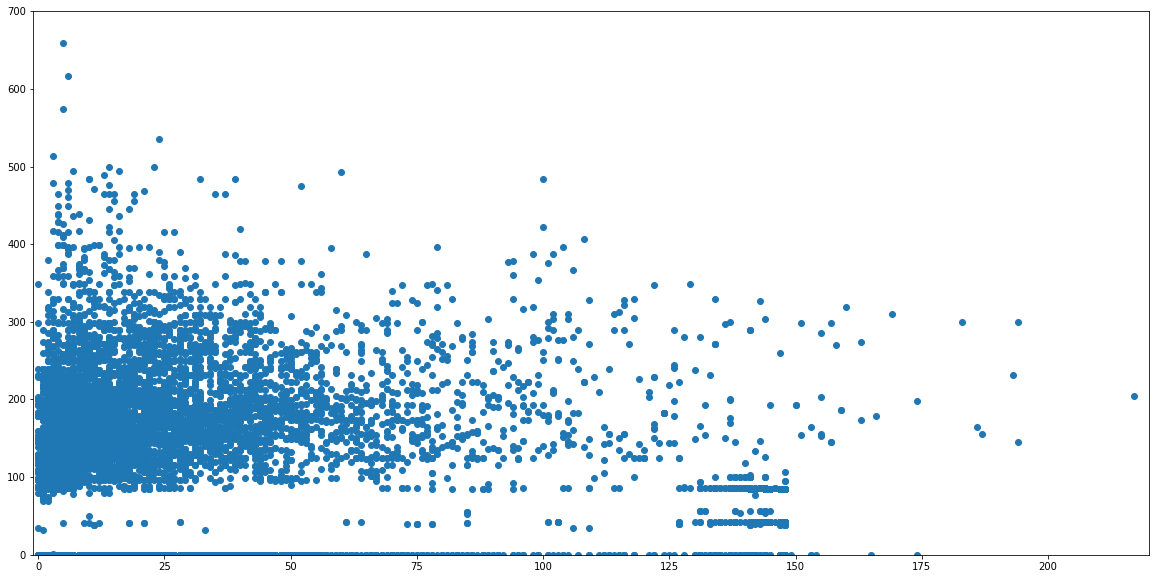

In [40]:
plt.figure(figsize=(20,10));
plt.scatter(df["flight_sale_diff_days"], df["Ticket cost"]);
plt.xlim(xmin=-1, xmax=220);
plt.ylim(ymin=0, ymax=700);

## Filter

Удалите следующие точки:
- все билеты, для которых столбец Sum равен 0 (отмененные заказы);
- все билеты, стоимость которых выше 1000 \$ (слишком дорого);
- все билеты, стоимость которых ниже 30$ (подозрительно дешево);
- а еще точки с NaN и билеты, которые купили очень мало людей в определенный срок (например, когда число дней между датами вылета и заказа {Flight Date - Sale Data} равно 111 и 124, где зафиксирована всего одна непрезентативная покупка), так как они тоже являются аномалиями для данной многомерной выборки.

In [41]:
df_filtered = df[df["Sum $"] > 0]  # все билеты, для которых столбец Sum равен 0
df_filtered = df_filtered[df_filtered["Ticket cost"] <= 1000] # все билеты, стоимость которых выше 1000
df_filtered = df_filtered[df_filtered["Ticket cost"] >= 30] # все билеты, стоимость которых ниже 30$
df_filtered = df_filtered[~df_filtered["flight_sale_diff_days"].isnull()]
df_filtered = df_filtered[~df_filtered["Ticket cost"].isnull()]
df_filtered = df_filtered[(df_filtered["flight_sale_diff_days"] != 111) & (df_filtered["flight_sale_diff_days"] != 124)]

df_filtered.head()

customer type    Year    order #  Sale Date Flight date  \
NaN NaN NaN NaN       private  2017.0  6762205.0 2017-01-17  2017-01-18   
            NaN        agency  2017.0  6828941.0 2017-02-28  2017-04-14   
            NaN        agency  2017.0  6834619.0 2017-03-02  2017-04-14   
            NaN        agency  2017.0  6842606.0 2017-03-07  2017-04-10   
            NaN       private  2017.0  6845956.0 2017-03-08  2017-04-14   

                Holiday Y/N   Sum $  Service1  Service2  Service3  # of legs  \
NaN NaN NaN NaN         NaN   250.0         0         0         0        2.0   
            NaN     Holiday  1500.0         1         0         0        4.0   
            NaN     Holiday   998.0         0         0         0        4.0   
            NaN     Holiday  1414.0         1         0         1        4.0   
            NaN     Holiday  4386.0         3         0         3       12.0   

                 Столбец1  Ticket cost flight_sale_diff  flight_sale_diff_days  
NaN NaN NaN NaN     250.0       125.00           1 days                    1.0  
            NaN     750.0       187.50          45 days                   45.0  
            NaN     998.0       249.50          43 days                   43.0  
            NaN     707.0       176.75          34 days                   34.0  
            NaN    2193.0       182.75          37 days                   37.0

In [42]:
df_filtered.describe()

,Year,order #,Sum $,Service1,Service2,Service3,# of legs,Столбец1,Ticket cost,flight_sale_diff,flight_sale_diff_days
count,6298.000000,6.298000e+03,6298.000000,6298.000000,6298.0,6298.000000,6298.000000,6298.000000,6298.000000,6298,6298.000000
mean,2017.773261,7.617145e+06,944.686488,0.434741,0.0,0.450460,3.801524,679.863273,177.259564,33 days 09:42:07.659574,33.404255
std,0.444510,2.791820e+05,1408.258402,1.036853,0.0,1.513952,4.446494,856.390289,74.842094,38 days 17:26:05.815570,38.726456
min,2017.000000,6.762205e+06,35.000000,0.000000,0.0,0.000000,1.000000,35.000000,31.500000,0 days 00:00:00,0.000000
25%,2018.000000,7.344508e+06,318.000000,0.000000,0.0,0.000000,2.000000,310.000000,125.000000,8 days 00:00:00,8.000000
50%,2018.000000,7.684253e+06,681.540000,0.000000,0.0,0.000000,4.000000,520.250000,165.500000,19 days 00:00:00,19.000000
75%,2018.000000,7.850704e+06,1192.000000,1.000000,0.0,1.000000,4.000000,795.000000,214.000000,42 days 00:00:00,42.000000
max,2019.000000,8.029507e+06,36791.610000,26.000000,0.0,78.000000,134.000000,24790.000000,659.000000,217 days 00:00:00,217.000000


### Plot

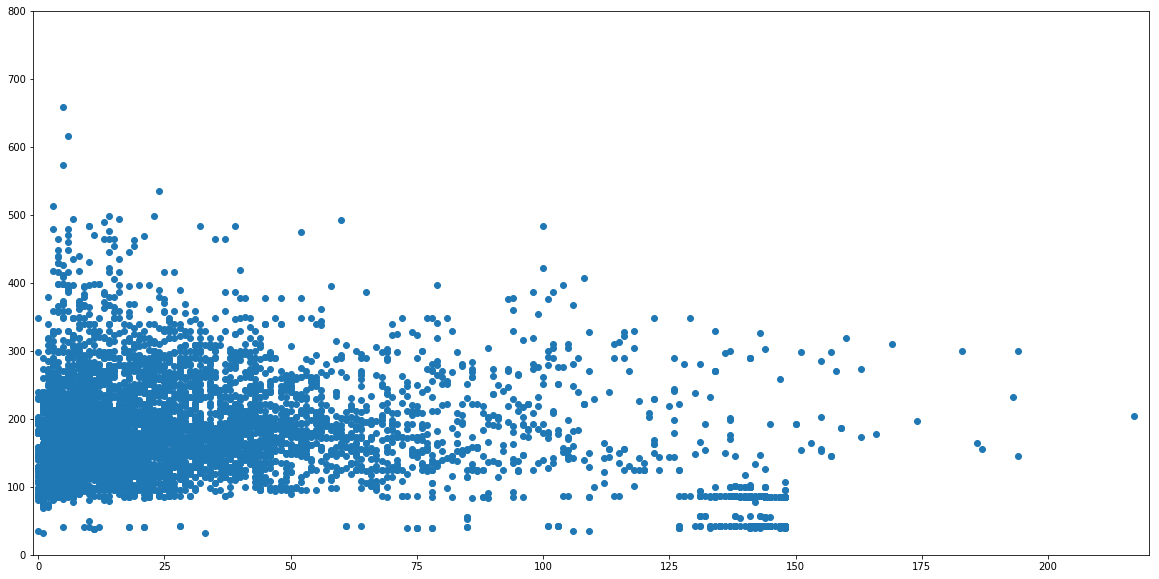

In [43]:
plt.figure(figsize=(20,10));
plt.scatter(df_filtered["flight_sale_diff_days"], df_filtered["Ticket cost"]);
plt.xlim(xmin=-1, xmax=220);
plt.ylim(ymin=0, ymax=800);

Для простоты дальнейших вычислений удалите также точки стоимости билетов со сроками покупки больше 148 дней, так как после этого срока точки покупок встречаются очень редко и их можно считать выбивающимися из общей зависимости (недостаточными для статистики).

In [44]:
df_filtered_2 = df_filtered[df_filtered["flight_sale_diff_days"] <= 148]

## Mean()

Попробуем построить из этого множества точек одномерный временной ряд стоимости билетов от числа предварительных дней до покупки. 

Первое, что можно сделать – это просто посчитать среднее значение стоимости билетов для каждого дня, то есть  посчитать функцию **mean()** от каждого массива стоимости билетов в каждой временной точке.

In [45]:
x = df_filtered_2["flight_sale_diff_days"]
y = df_filtered_2["Ticket cost"]

x_mean, y_mean = zip(*sorted((x_val, np.mean([y_val for a, y_val in zip(x, y) if x_val==a])) for x_val in set(x)))

In [46]:
def smooth(x, window_len):
    if window_len<3:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]

In [47]:
y_smooth = smooth(y_mean, 50)

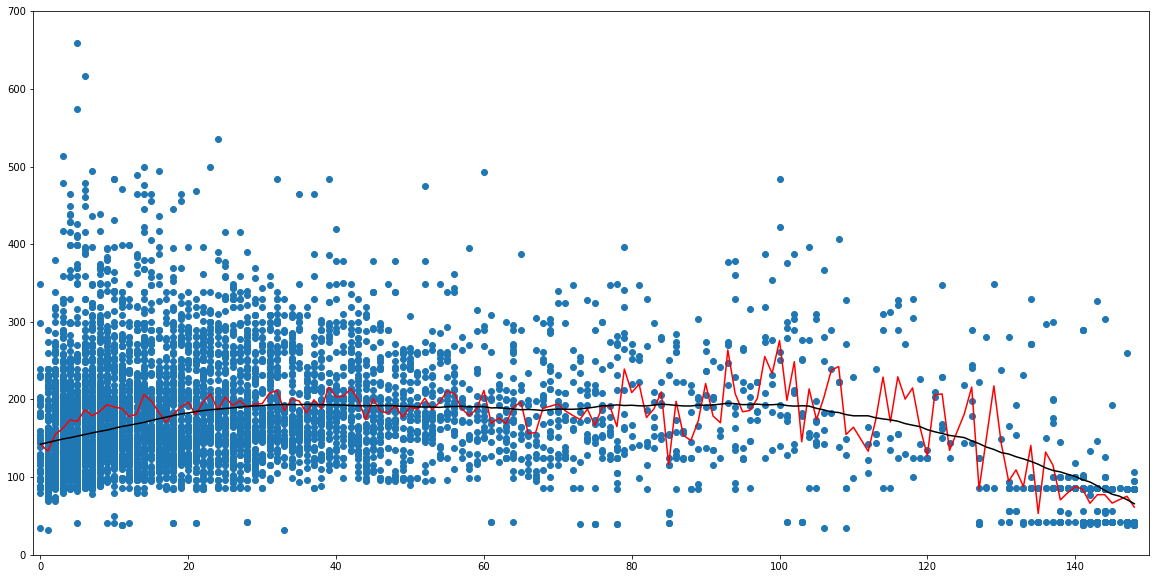

In [48]:
plt.figure(figsize=(20,10));
plt.scatter(df_filtered_2["flight_sale_diff_days"], df_filtered_2["Ticket cost"]);
plt.plot(x_mean, y_mean, color='r');
plt.plot(x_mean, y_smooth, color='k');
plt.xlim(xmin=-1, xmax=150);
plt.ylim(ymin=0, ymax=700);

## Median() & STD

Во-первых, стоимость билетов принимает некоторые явные значения из множества, нежели «абстрактные» средние величины, поэтому более верным будет построить график расчета медианы median() от времени

In [49]:
x_median, y_median = zip(*sorted((x_val, np.median([y_val for a, y_val in zip(x, y) if x_val==a])) for x_val in set(x)))

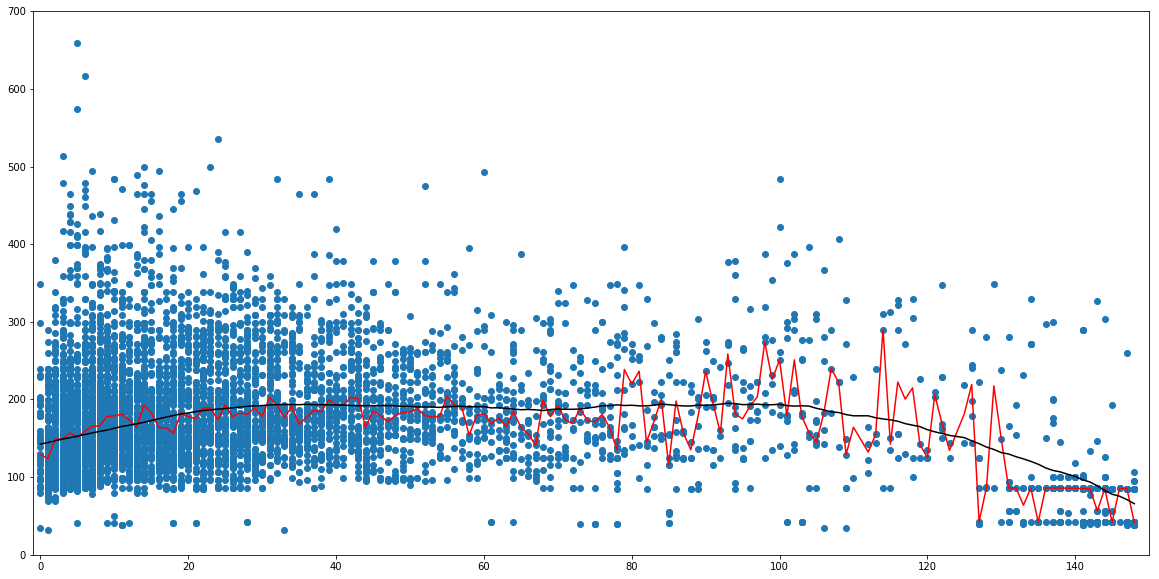

In [50]:
y_median_smooth = smooth(y_median, 50)

plt.figure(figsize=(20,10));
plt.scatter(df_filtered_2["flight_sale_diff_days"], df_filtered_2["Ticket cost"]);
plt.plot(x_median, y_median, color='r');
plt.plot(x_median, y_smooth, color='k');
plt.xlim(xmin=-1, xmax=150);
plt.ylim(ymin=0, ymax=700);

Во-вторых, функция среднего значения есть дискретная форма мат. ожидания только для стационарных и эргодических случайных величин (здесь случайная величина = стоимость билетов). Ни то ни другое условие здесь явно не выполняется, а значит построенные кривые демонстрируют стоимость билетов от числа предварительных дней, как если бы стоимость их была бы равномерно разбросана в каждом временном отсчете (это явно не так).

В-третьих, нас интересует усредненный прогноз цен на авиабилеты от числа предварительных дней между их датами покупки и вылета, а у прогноза еще есть такое понятие, как доверительный интервал. То есть, кроме средних цен на билеты нас интересует в каком диапазоне цены разбросаны вообще, а этого простым вычислением среднего уже не посчитать. Вообще-то, есть еще дисперсия или СКВО, но см. проблему №2 выше.

**Постройте** подобные оценочные интервалы (среднее ± 1.65*std(), со сглаживанием) самостоятельно.

In [51]:
x_std, y_std = zip(*sorted((x_val, np.std([y_val for a, y_val in zip(x, y) if x_val==a])) for x_val in set(x)))

In [52]:
y_mean_std_plus = y_mean + np.array(y_std) * 1.65
y_mean_std_minus = y_mean - np.array(y_std) * 1.65

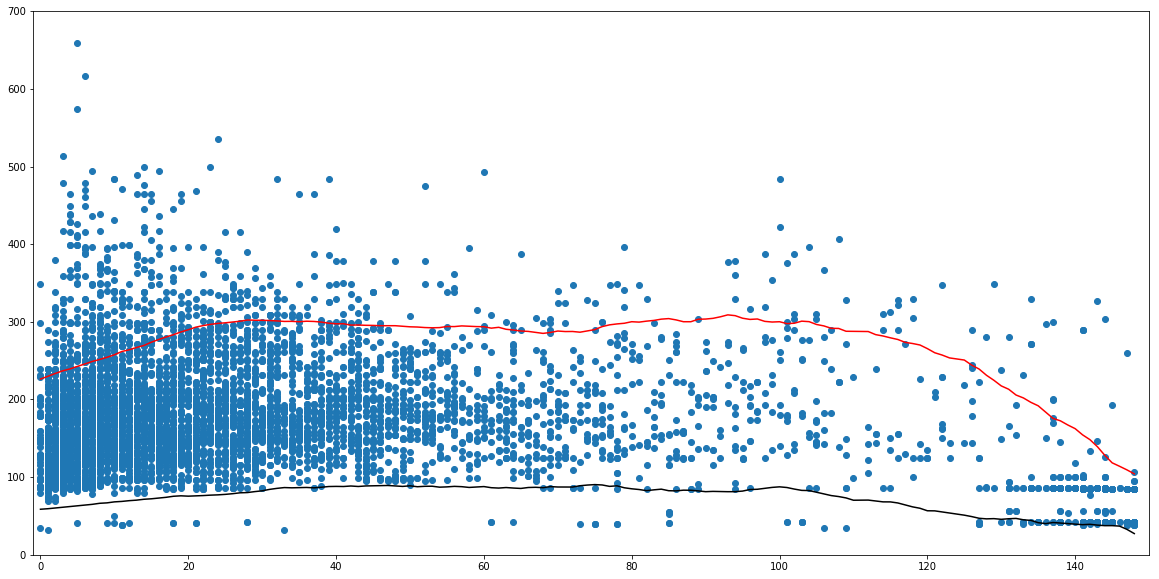

In [53]:
y_smooth_plus = smooth(y_mean_std_plus, 50)
y_smooth_minus = smooth(y_mean_std_minus, 50)

plt.figure(figsize=(20,10));
plt.scatter(df_filtered_2["flight_sale_diff_days"], df_filtered_2["Ticket cost"]);
plt.plot(x_std, y_smooth_plus, color='r');
plt.plot(x_std, y_smooth_minus, color='k');
plt.xlim(xmin=-1, xmax=150);
plt.ylim(ymin=0, ymax=700);

## Scipy

Для решения всех указанных проблем используется более научная методика. Пусть каждый набор точек (стоимости билетов) в каждом временном отсчете (число дней) есть выборка некоторой случайной величины. Если это случайная величина – у нее есть функция распределения (плотность), благодаря которой можно оценить ее мат. ожидание = 50%-перцентиль (средняя стоимость билета) и доверительные интервалы = 5%-перцентиль и 95%-перцентиль (разброс стоимости билетов по дням). 

Значит, самое главное – построить плотность функции распределения для этой неизвестной случайной величины стоимости билета. Для этого в Python есть библиотека **scipy.stats**.

In [54]:
import scipy.stats as st

# distribution.fit(data) и distribution.pdf(x).

In [55]:
dist = st.norm

Для начала попробуйте сопоставить гистограмму стоимости билетов, например, для разности дат = 7 дней, с плотностью нормального распределения с найденными параметрами.

In [59]:
data = df_filtered_2[df_filtered_2.flight_sale_diff_days == 7]["Ticket cost"].values
params = dist.fit(data)

In [60]:
y, x = np.histogram(data, bins='auto', density=True)
pdf_fitted = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])

И постройте гистограмму и полученную кривую на одном рисунке.

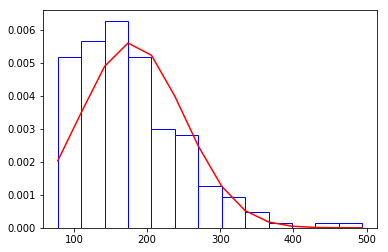

In [61]:
y, x = np.histogram(data, bins='auto', density=True)
pdf_fitted = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])

plt.plot(x, pdf_fitted, color='red');
_, _, _ = plt.hist(data, bins='auto', density=True, color='white', ec="blue");

Аналогичным образом найдите функции плотности нормального распределения для всех временных точек (дней), но без построения
гистограмм/кривых. Возможно, не все точки в принципе возможно подогнать под нормальное распределение, и тогда Python будет
выдавать предупреждения (warning), но пока что их можно игнорировать.

In [64]:
def norm_dense(days):
    data = df_filtered_2[df_filtered_2.flight_sale_diff_days == days]["Ticket cost"].values
    if len(data) == 0:
        return None
    params = dist.fit(data)
    return params

In [65]:
days_pdf = list()

for days in range(0, 149):
    days_pdf.append(norm_dense(days))

Чтобы рассчитать значение перцентилей для найденных распределений в Scipy есть функция **ppf()**

Найдите 5%, 50% и 95%-перцентили для нормального распределения для всех заданных временных точек и постройте полученные значения на исходном графике соотношения цен на билеты.

In [66]:
pp05_list = list()
pp50_list = list()
pp95_list = list()

for params in days_pdf:
    if params:
        # 5%-перцентиль (нижний доверительный интервал)
        pp05 = dist.ppf(0.05, *params[:-2], loc=params[-2], scale=params[-1])
        pp05_list.append(pp05)

        # 50%-перцентиль (средний прогноз)
        pp50 = dist.ppf(0.50, *params[:-2], loc=params[-2], scale=params[-1])
        pp50_list.append(pp50)

        # 95%-перцентиль (верхний доверительный интервал)
        pp95 = dist.ppf(0.95, *params[:-2], loc=params[-2], scale=params[-1])
        pp95_list.append(pp95)

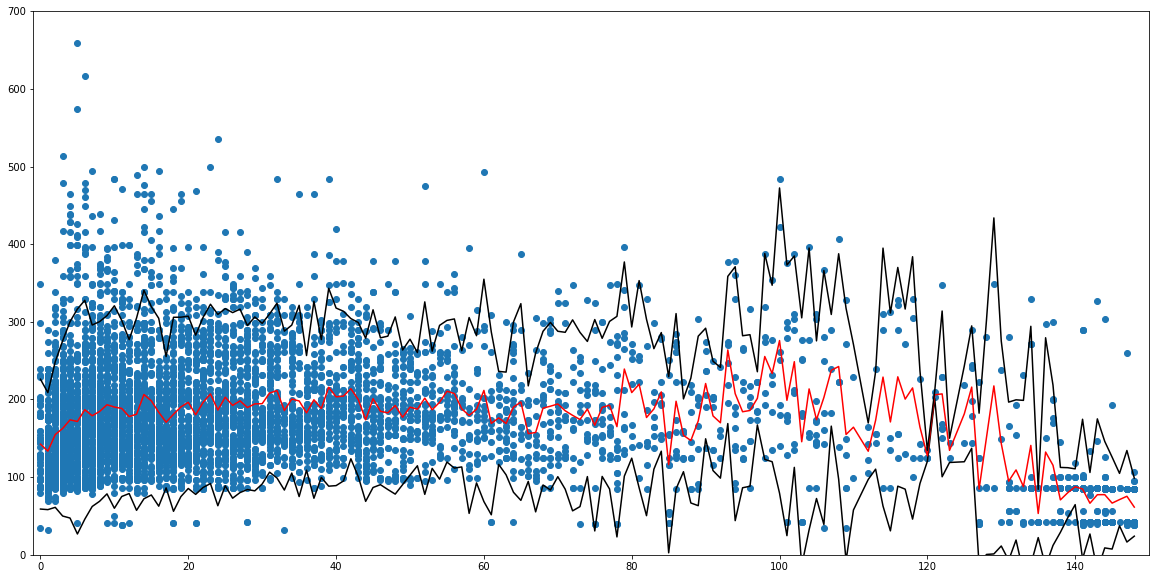

In [67]:
plt.figure(figsize=(20,10));
plt.scatter(df_filtered_2["flight_sale_diff_days"], df_filtered_2["Ticket cost"]);
plt.plot(x_mean, pp05_list, color='k');
plt.plot(x_mean, pp50_list, color='r');
plt.plot(x_mean, pp95_list, color='k');
plt.xlim(xmin=-1, xmax=150);
plt.ylim(ymin=0, ymax=700);

Сгладьте полученные кривые.

In [68]:
pp05_smooth = smooth(pp05_list, 50)
pp50_smooth = smooth(pp50_list, 50)
pp95_smooth = smooth(pp95_list, 50)

## Ядро (kernel)

In [69]:
from scipy.stats import gaussian_kde

In [70]:
kde = gaussian_kde(x.ravel()) # строим оценку
# plt.plot(kde.pdf(np.linspace(x.min(), x.max(), x.size)))

# функция распределения в границах случайной величины

Осталось оценить нужные нам перцентили:

In [71]:
def kde_perc(ikde, low, high, n, perc=0.50):
    for i in np.linspace(low, high, n)[1:]: # от нижней до верхней границы
        F = ikde.integrate_box_1d(low, i) # интеграл плотности
        if F > perc: # чуть выше границы суммы
            return i # есть искомое значение

In [72]:
# kde_perc(kde, x.min(), x.max(), x.size, 0.05) # 05%-перцентиль
# kde_perc(kde, x.min(), x.max(), x.size, 0.50) # 50%-перцентиль
# kde_perc(kde, x.min(), x.max(), x.size, 0.95) # 95%-перцентиль

In [73]:
kde_05_list = list()
kde_50_list = list()
kde_95_list = list()

for value in x_mean:
    x = df_filtered[df_filtered.flight_sale_diff_days == value]["Ticket cost"]
    kde = gaussian_kde(x) # строим оценку
    
    kde_05 = kde_perc(kde, x.min(), x.max(), x.size, 0.05)
    kde_50 = kde_perc(kde, x.min(), x.max(), x.size, 0.50)
    kde_95 = kde_perc(kde, x.min(), x.max(), x.size, 0.95)
    
    kde_05_list.append(kde_05)
    kde_50_list.append(kde_50)
    kde_95_list.append(kde_95)

In [74]:
kde_50_list_2 = []

for index, kde in enumerate(kde_50_list):
    if kde is not None:
        kde_50_list_2.append(kde)
    else:
        kde_50_list_2.append(y_median[index])

Теперь, если найти непараметрические распределения стоимости билетов для каждой временной точки и затем для них нужные
перцентили, то получится график:

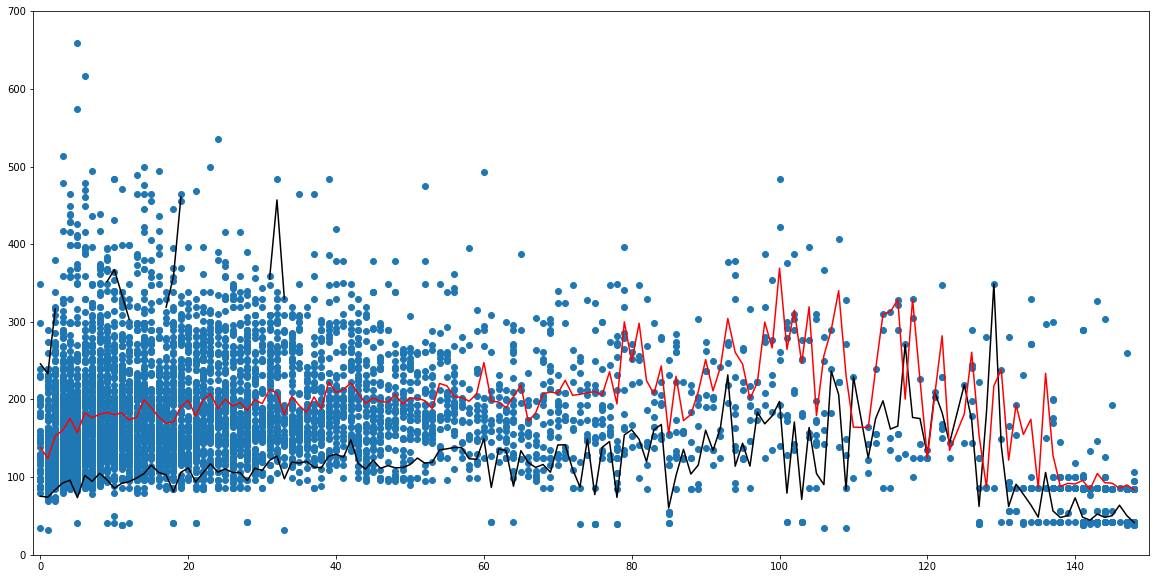

In [75]:
plt.figure(figsize=(20,10));
plt.scatter(df_filtered_2["flight_sale_diff_days"], df_filtered_2["Ticket cost"]);
plt.plot(x_mean, kde_05_list, color='k');
plt.plot(x_mean, kde_50_list_2, color='r');
plt.plot(x_mean, kde_95_list, color='k');
plt.xlim(xmin=-1, xmax=150);
plt.ylim(ymin=0, ymax=700);

In [76]:
x = df_filtered_2["flight_sale_diff_days"].values
y = df_filtered_2["Ticket cost"].values

x_median, y_median = zip(*sorted((x_val, np.median([y_val for a, y_val in zip(x, y) if x_val==a])) for x_val in set(x)))
x_std, y_std = zip(*sorted((x_val, np.std([y_val for a, y_val in zip(x, y) if x_val==a])) for x_val in set(x)))

In [77]:
perc_05_list = list()
perc_50_list = list()
perc_95_list = list()

for value in x_mean:
    x = df_filtered[df_filtered.flight_sale_diff_days == value]["Ticket cost"]
    kde = gaussian_kde(x) # строим оценку
    
    perc_05 = np.percentile(x, 5)
    perc_50 = np.percentile(x, 50)
    perc_95 = np.percentile(x, 95)
    
    perc_05_list.append(perc_05)
    perc_50_list.append(perc_50)
    perc_95_list.append(perc_95)

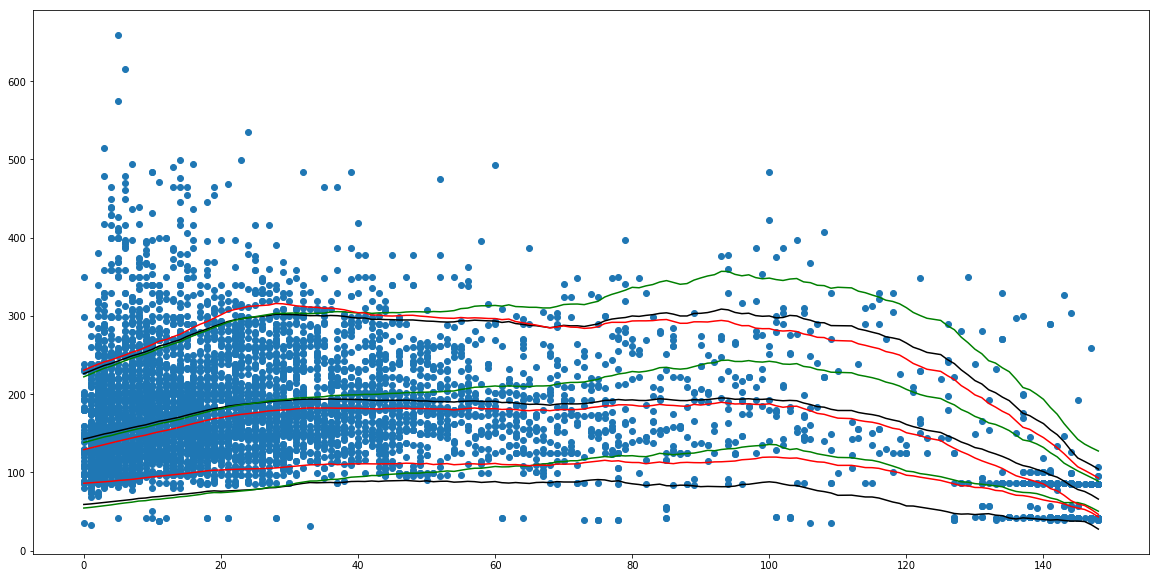

In [78]:
plt.figure(figsize=(20,10));
plt.scatter(df_filtered_2["flight_sale_diff_days"], df_filtered_2["Ticket cost"]);

# параметрический
plt.plot(x_mean, pp05_smooth, color='k');
plt.plot(x_mean, pp50_smooth, color='k');
plt.plot(x_mean, pp95_smooth, color='k');

# непараметрический
plt.plot(x_mean, smooth(np.array(kde_50_list_2) + np.array(y_std) * 1.65, 50), color='g');
plt.plot(x_mean, smooth(np.array(kde_50_list_2) - np.array(y_std) * 1.65, 50), color='g');
plt.plot(x_mean, smooth(np.array(kde_50_list_2), 50), color='g');

# медиана
plt.plot(x_mean, smooth(perc_05_list, 50), color='r');
plt.plot(x_mean, smooth(perc_50_list, 50), color='r');
plt.plot(x_mean, smooth(perc_95_list, 50), color='r');